

---



---

# Softmax Regression



---



---


Softmax regression, also known as multinomial logistic regression, extends logistic regression to multi-class classification problems. It predicts the probability P(y = k | x) of each class k given the input features x. The predicted probabilities are computed using the softmax function:

$\hat{p}_k = \sigma(s(\mathbf{x}))_k = \frac{\exp(s_k(\mathbf{x}))}{\sum_{j=1}^{K} \exp(s_j(\mathbf{x}))}$

where:
- K is the number of classes
- s(x) is a vector containing the scores of each class for the input x
- $s_k(x)$ is the score for class k
- $\sigma(s(\mathbf{x}))_k$ is the predicted probability that x belongs to class k

Softmax regression is commonly used in multi-class classification tasks, such as image recognition and natural language processing.











---


In this notebook, we will explore Softmax Regression, a method for multiclass classification, using the Iris dataset.


---



This code start with imports necessary libraries and modules, then loads the Iris dataset, extracts relevant features, and converts the target variable to binary (1 if Iris virginica, else 0). After training a logistic regression model, it creates a meshgrid of petal length and width values for contour plotting. The code calculates predicted probabilities for each class and plots the data points, contour plot representing the decision boundary and predicted probabilities, and the decision boundary itself. Finally, it adds class labels, annotations, axis labels, sets axis limits, and displays the plot.

`LogisticRegression` is a popular machine learning algorithm for binary classification tasks. Ay its core its a simple linear regression wrapped inside a logistic function with a slightly modified cost function. For multiclass predictions, LogisticRegression employs a one-vs-rest (OvR) approach by default, where a separate model is trained for each class to distinguish it from all other classes, but it can also use the multinomial option to predict multiple classes directly. This flexibility is controlled by the multi_class parameter. It uses the `solver` attribute to specify the algorithm used for optimization, such as 'liblinear', 'newton-cg', 'lbfgs', 'sag', and 'saga'.


For comprehensive information, refer to the [LogisticRegression documentation](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegression.html).


Lets extracts the petal length and width features from the Iris dataset. Then, it instantiates and trains a multinomial logistic regression (Softmax regression) model using the extracted features and the target variable. The `multi_class` parameter is set to "multinomial" to indicate multinomial logistic regression, and the `solver` parameter is set to "lbfgs". The regularization strength `C` is set to 10, and a random state of 42 is used for reproducibility.

In [1]:
# Importing necessary libraries and modules
from sklearn.linear_model import LogisticRegression
import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets
iris = datasets.load_iris()
list(iris.keys())

['data',
 'target',
 'frame',
 'target_names',
 'DESCR',
 'feature_names',
 'filename',
 'data_module']

In [2]:
# Extracting petal length and width features and converting target variable to binary
X = iris["data"][:, (2, 3)]  # petal length, petal width
y = (iris["target"] == 2).astype(int)  # 1 if Iris virginica, else 0

# Instantiating and training a logistic regression model
log_reg = LogisticRegression(solver="lbfgs", C=10**10, random_state=42)
log_reg.fit(X, y)

# Creating a meshgrid of petal length and width values for contour plot
x0, x1 = np.meshgrid(
        np.linspace(2.9, 7, 500).reshape(-1, 1),
        np.linspace(0.8, 2.7, 200).reshape(-1, 1),
    )
X_new = np.c_[x0.ravel(), x1.ravel()]


# Calculating predicted probabilities for each class
y_proba = log_reg.predict_proba(X_new)

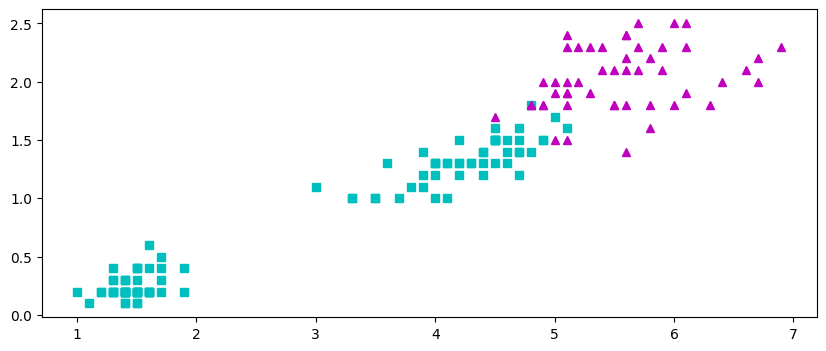

In [8]:
y_proba.round(6)

array([[1., 0.],
       [1., 0.],
       [1., 0.],
       ...,
       [0., 1.],
       [0., 1.],
       [0., 1.]])

(2.9, 7.0, 0.8, 2.7)

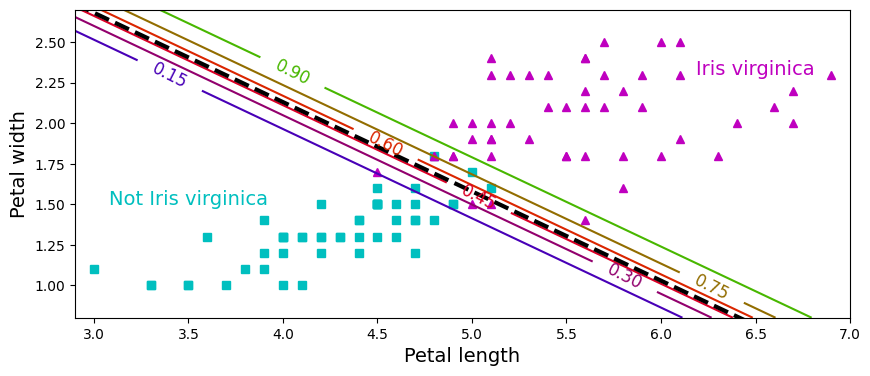

In [12]:


# Plotting the data points and contour plot
plt.figure(figsize=(10, 4))
plt.plot(X[y==0, 0], X[y==0, 1], "cs")  # Scatter plot for non-Virginica iris flowers
plt.plot(X[y==1, 0], X[y==1, 1], "m^")  # Scatter plot for Virginica iris flowers

# Contour plot representing the decision boundary and predicted probabilities
zz = y_proba[:, 1].reshape(x0.shape)
contour = plt.contour(x0, x1, zz, cmap=plt.cm.brg)


# Plotting the decision boundary
left_right = np.array([2.9, 7])
boundary = -(log_reg.coef_[0][0] * left_right + log_reg.intercept_[0]) / log_reg.coef_[0][1]
plt.plot(left_right, boundary, "k--", linewidth=3)

# Adding class labels and annotations
plt.clabel(contour, inline=1, fontsize=12)
plt.text(3.5, 1.5, "Not Iris virginica", fontsize=14, color="c", ha="center")
plt.text(6.5, 2.3, "Iris virginica", fontsize=14, color="m", ha="center")

# Adding axis labels, axis limits, and saving the plot
plt.xlabel("Petal length", fontsize=14)
plt.ylabel("Petal width", fontsize=14)
plt.axis([2.9, 7, 0.8, 2.7])
# plt.show()

In [13]:
# Extracting petal length and width features
X = iris["data"][:, (2, 3)]  # petal length, petal width
y = iris["target"]

# Instantiating and training a multinomial logistic regression (Softmax regression) model
softmax_reg = LogisticRegression(multi_class="multinomial", solver="lbfgs", C=10, random_state=42)
softmax_reg.fit(X, y)


LogisticRegression(C=10, multi_class='multinomial', random_state=42)

This code predicts the class probabilities and class predictions for a meshgrid of points covering the range of petal lengths and widths in the Iris dataset using a trained multinomial logistic regression model. It then plots the contour plot of class probability contours and decision boundaries along with the actual data points from the dataset. Different colors and markers represent different classes of Iris flowers.

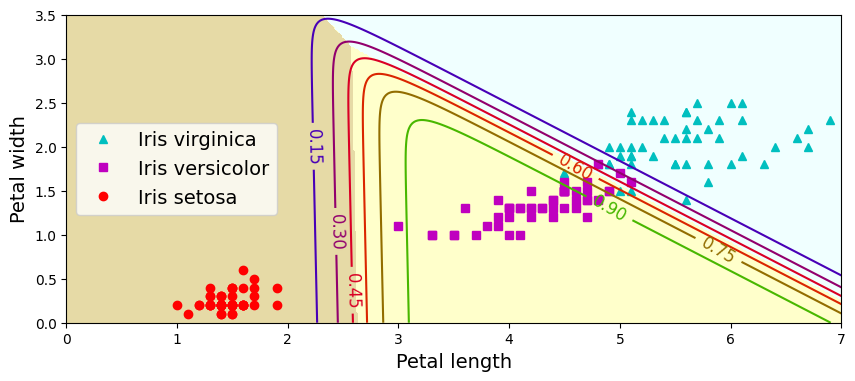

In [14]:
x0, x1 = np.meshgrid(
        np.linspace(0, 8, 500).reshape(-1, 1),
        np.linspace(0, 3.5, 200).reshape(-1, 1),
    )
X_new = np.c_[x0.ravel(), x1.ravel()]

# Predicting class probabilities and class predictions for the meshgrid points
y_proba = softmax_reg.predict_proba(X_new)
y_predict = softmax_reg.predict(X_new)

# Reshaping predicted probabilities and predictions to the meshgrid shape
zz1 = y_proba[:, 1].reshape(x0.shape)
zz = y_predict.reshape(x0.shape)

# Plotting the contour plot and data points
plt.figure(figsize=(10, 4))
plt.plot(X[y==2, 0], X[y==2, 1], "c^", label="Iris virginica")
plt.plot(X[y==1, 0], X[y==1, 1], "ms", label="Iris versicolor")
plt.plot(X[y==0, 0], X[y==0, 1], "ro", label="Iris setosa")

# Creating a custom colormap for contour plots
from matplotlib.colors import ListedColormap
custom_cmap = ListedColormap(['#E6DAA6', '#FFFFCB', '#F0FFFF'])

# Plotting the decision boundaries and class probability contours
plt.contourf(x0, x1, zz, cmap=custom_cmap)
contour = plt.contour(x0, x1, zz1, cmap=plt.cm.brg)
plt.clabel(contour, inline=1, fontsize=12)
plt.xlabel("Petal length", fontsize=14)
plt.ylabel("Petal width", fontsize=14)
plt.legend(loc="center left", fontsize=14)
plt.axis([0, 7, 0, 3.5])
plt.show()


The code `softmax_reg.predict([[5, 2]])` predicts the class of a single instance with petal length of 5 and petal width of 2 using the trained multinomial logistic regression (softmax regression) model `softmax_reg`.

In [15]:
softmax_reg.predict([[5, 2]])

array([2])

The code `softmax_reg.predict_proba([[5, 2]])` calculates the probabilities of each class for a single instance with petal length of 5 and petal width of 2 using the trained multinomial logistic regression (softmax regression) model `softmax_reg`.

In [ ]:
softmax_reg.predict_proba([[5, 2]])

array([[6.38014896e-07, 5.74929995e-02, 9.42506362e-01]])